<a href="https://colab.research.google.com/github/CharuniPremarathne/Deep_Learning_Labs/blob/main/Lab2/MLP_with_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#import libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [8]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Visualize the dataset

Target labels:  [2 8 9 3 8 8 8 3 4 1]


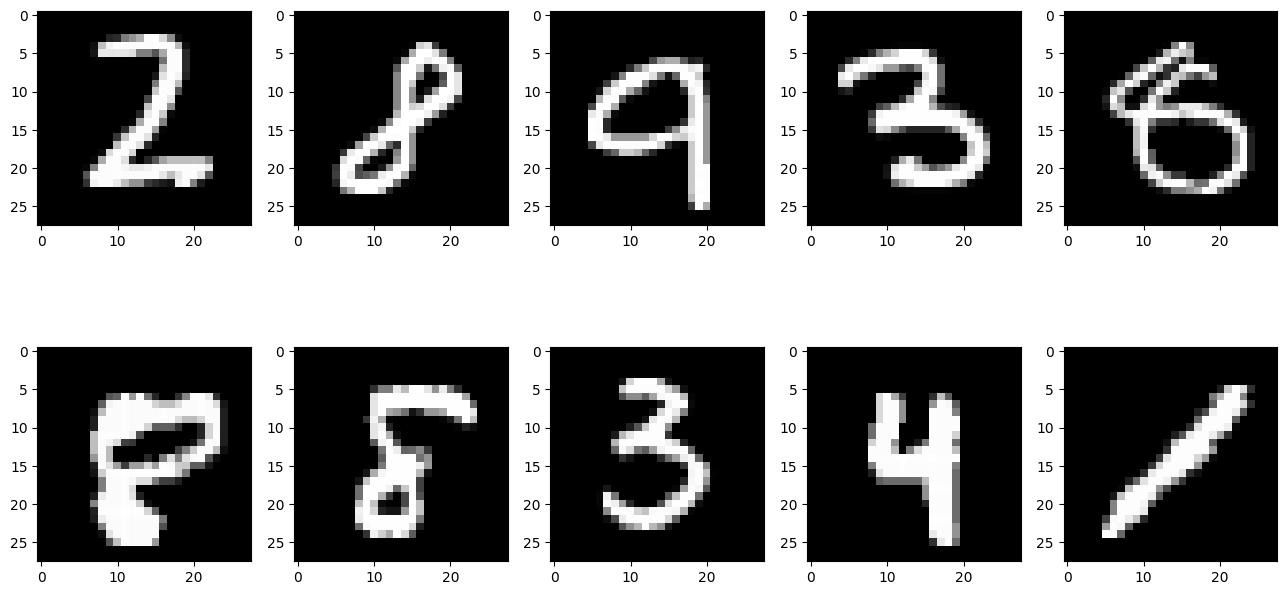

In [9]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [10]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [ ]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu'))
model.add(Dense(64,input_dim=64,activation='relu'))
model.add(Dense(32,input_dim=64,activation='relu'))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.regularizers import l1_l2

# Create a sequential model
model = Sequential()

# Add the layers with L1 and L2 regularization
model.add(Flatten(input_shape=(28, 28)))

model.add(Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.00001, l2=0.00001)))
model.add(Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.00001, l2=0.00001)))
model.add(Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.00001, l2=0.00001)))
model.add(Dense(10, activation='softmax', kernel_regularizer=l1_l2(l1=0.00001, l2=0.00001)))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 56,810
Trainable params: 56,810
Non-trainable params: 0
_________________________________________________________________


Train the model

In [13]:
train_info = model.fit(new_train_data , new_train_target , epochs = 25)

Epoch 1/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3130 - accuracy: 0.9147
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1564 - accuracy: 0.9621
Epoch 3/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1254 - accuracy: 0.9714
Epoch 4/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1095 - accuracy: 0.9764
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0997 - accuracy: 0.9796
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0923 - accuracy: 0.9820
Epoch 7/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0853 - accuracy: 0.9847
Epoch 8/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0825 - accuracy: 0.9856
Epoch 9/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0793 - accuracy: 0.9864
Epoch 10/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.076

Plot the loss and accuracy graphs

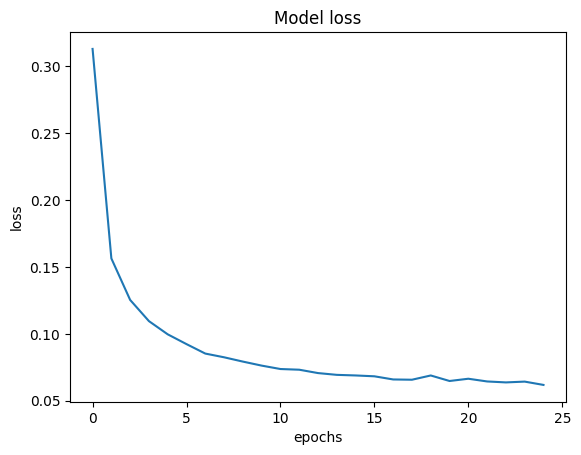

In [14]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

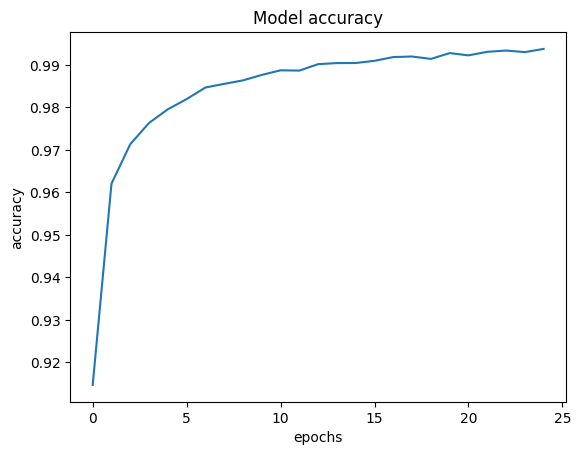

In [15]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [16]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 1s 1ms/step - loss: 0.1297 - accuracy: 0.9790
Loss of the Test dataset is: 0.12970282137393951
Accuracy of the test dataset is: 0.9789999723434448


Save the model weights

In [17]:
model.save_weights('MNIST_WEIGHTS_V1.h5')


Confusion Matrix

313/313 [==============================] - 1s 2ms/step


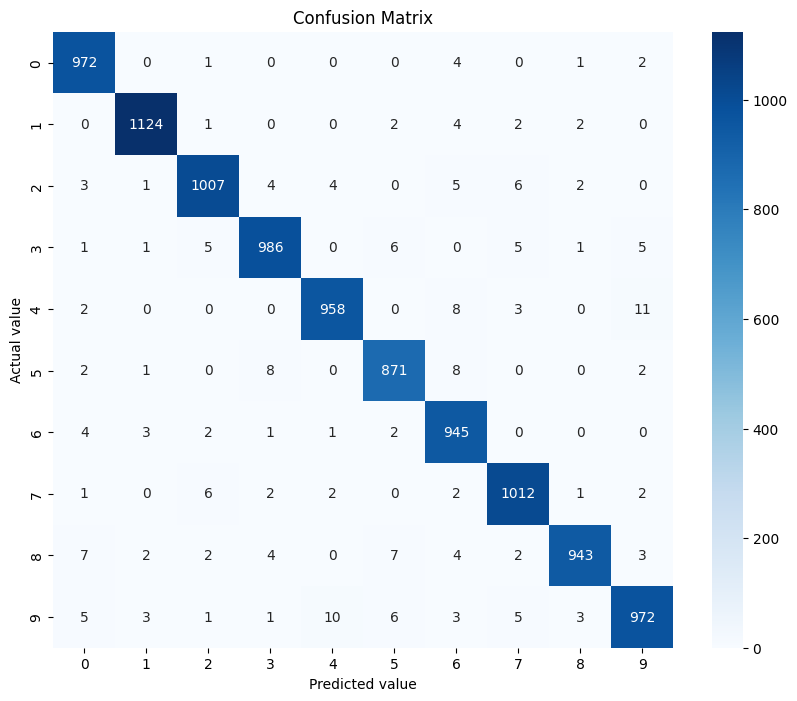

In [22]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

predictions = model.predict(new_test_data)
predicted_labels = np.argmax(predictions, axis=1)

conf_mtx = confusion_matrix(test_target, predicted_labels)

plt.figure(figsize = (10,8))
sns.heatmap(conf_mtx, annot = True, fmt = 'd', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.title('Confusion Matrix')
plt.show()